In [1]:
# Import all of modules we will need

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Each array of logitude and latitude will have variables assigned to them.

In [3]:
# we will generate the numbers, assign a variable, and combine them into sets using the (zip) function

In [4]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
   # print(coordinate[0], coordinate[1])

In [7]:
# Import citipy module

from citipy import citipy

In [8]:
#Create a list for holding the cities.

cities = []

#Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    
    if city not in cities:
        
        cities.append(city)
        
#Print the city count to confirm sufficient count

len(cities)

624

In [9]:
#Import the time library and the dateime mdoule from the datiem library
from citipy import citipy

import time

from datetime import datetime


In [10]:
#Import the requests library.

import requests

#Import the API key.

from config import weather_api_key

In [11]:
# Starting URL for the Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
#Create an empty list to hold the weather data

city_data = []

#Print the beginning of the logging

print("Beginning Data Retrieval     ")

print("-----------------------------")

#Create counters

record_count = 1

set_count = 1

#Loop through all the cities in our list

for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
    #Create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 toS the record count
    
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        
        #Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data
        
        city_lat = city_weather['coord']['lat']
        
        city_lng = city_weather['coord']['lon']
        
        city_max_temp = city_weather['main']['temp_max']
        
        city_humidity = city_weather['main']['humidity']
        
        city_clouds = city_weather['clouds']['all']
        
        city_wind = city_weather['wind']['speed']
        
        city_country = city_weather['sys']['country']
        
        #Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list
        
        city_data.append({'City': city.title(),
                          
                          'Lat': city_lat, 
                          
                          'Lng': city_lng, 
                          
                          'Max Temp': city_max_temp, 
                          
                          'Humidity': city_humidity, 
                          
                          'Cloudiness': city_clouds, 
                          
                          'Wind Speed': city_wind, 
                          
                          'Country': city_country, 
                          
                          'Date': city_date})
        
#If an error is experienced, skip the city
    except:
        
        print("City not found. Skipping...")
        
        pass

#Indicate that the Data Loading is complete

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")


    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.                                    
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | fairmont
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | skibbereen
Processing Record 7 of Set 1 | novocheremshansk
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | aksha
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | olafsvik
Processing Record 16 of Set 1 | domoni
Processing Record 17 of Set 1 | penzance
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | malinovskiy
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | dongying
Processing Record 23 of Se

Processing Record 40 of Set 4 | brae
Processing Record 41 of Set 4 | chara
Processing Record 42 of Set 4 | karaidel
Processing Record 43 of Set 4 | port-gentil
Processing Record 44 of Set 4 | klaksvik
Processing Record 45 of Set 4 | najran
Processing Record 46 of Set 4 | narsaq
Processing Record 47 of Set 4 | riyadh
Processing Record 48 of Set 4 | mutis
Processing Record 49 of Set 4 | nehe
Processing Record 50 of Set 4 | dilla
Processing Record 1 of Set 5 | grand baie
Processing Record 2 of Set 5 | itarema
Processing Record 3 of Set 5 | ippy
Processing Record 4 of Set 5 | safwah
City not found. Skipping...
Processing Record 5 of Set 5 | sioux lookout
Processing Record 6 of Set 5 | turtas
Processing Record 7 of Set 5 | ponta do sol
Processing Record 8 of Set 5 | kurilsk
Processing Record 9 of Set 5 | buala
Processing Record 10 of Set 5 | lebu
Processing Record 11 of Set 5 | boende
Processing Record 12 of Set 5 | deputatskiy
Processing Record 13 of Set 5 | savonlinna
Processing Record 14

Processing Record 25 of Set 8 | tokur
Processing Record 26 of Set 8 | wichita falls
Processing Record 27 of Set 8 | srinagar
Processing Record 28 of Set 8 | nelson bay
Processing Record 29 of Set 8 | iraklia
Processing Record 30 of Set 8 | ojinaga
Processing Record 31 of Set 8 | rantepao
Processing Record 32 of Set 8 | platanos
Processing Record 33 of Set 8 | deloraine
Processing Record 34 of Set 8 | mitu
Processing Record 35 of Set 8 | iwanai
Processing Record 36 of Set 8 | carutapera
Processing Record 37 of Set 8 | cockburn town
Processing Record 38 of Set 8 | dondo
Processing Record 39 of Set 8 | atambua
Processing Record 40 of Set 8 | kudahuvadhoo
Processing Record 41 of Set 8 | sola
Processing Record 42 of Set 8 | fort nelson
Processing Record 43 of Set 8 | haapiti
Processing Record 44 of Set 8 | zhanaozen
Processing Record 45 of Set 8 | dzitas
Processing Record 46 of Set 8 | nahuizalco
Processing Record 47 of Set 8 | fallon
Processing Record 48 of Set 8 | northam
Processing Recor

Processing Record 16 of Set 12 | atoyatempan
Processing Record 17 of Set 12 | suraabad
Processing Record 18 of Set 12 | nefteyugansk
Processing Record 19 of Set 12 | invermere
Processing Record 20 of Set 12 | rovaniemi
Processing Record 21 of Set 12 | kailua
Processing Record 22 of Set 12 | gainesville
Processing Record 23 of Set 12 | menongue
Processing Record 24 of Set 12 | port moresby
Processing Record 25 of Set 12 | santiago
Processing Record 26 of Set 12 | ankazoabo
Processing Record 27 of Set 12 | lamu
Processing Record 28 of Set 12 | wangqing
Processing Record 29 of Set 12 | goure
Processing Record 30 of Set 12 | filingue
Processing Record 31 of Set 12 | mnogovershinnyy
Processing Record 32 of Set 12 | khuzhir
Processing Record 33 of Set 12 | fershampenuaz
Processing Record 34 of Set 12 | elko
Processing Record 35 of Set 12 | vila franca do campo
Processing Record 36 of Set 12 | mumbwa
Processing Record 37 of Set 12 | gazanjyk
Processing Record 38 of Set 12 | jiaojiang
Processi

In [13]:
len(cities)

624

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,68.56,94,65,3.00,EC,2022-07-19 02:47:27
1,Fairmont,39.4851,-80.1426,72.77,93,97,3.83,US,2022-07-19 02:43:30
2,Esperance,-33.8667,121.9000,59.02,74,5,6.73,AU,2022-07-19 02:47:28
3,Kruisfontein,-34.0033,24.7314,52.88,92,50,4.43,ZA,2022-07-19 02:47:28
4,Hermanus,-34.4187,19.2345,52.81,80,99,6.11,ZA,2022-07-19 02:47:28
5,Skibbereen,51.5500,-9.2667,65.10,91,100,4.92,IE,2022-07-19 02:47:04
6,Novocheremshansk,54.3571,50.1666,66.07,95,74,9.86,RU,2022-07-19 02:47:29
7,Carnarvon,-24.8667,113.6333,69.57,43,0,11.16,AU,2022-07-19 02:47:29
8,Rikitea,-23.1203,-134.9692,74.41,77,3,11.92,PF,2022-07-19 02:47:00
9,Bluff,-46.6000,168.3333,45.81,69,96,15.68,NZ,2022-07-19 02:47:30


In [15]:
#Reorder columns by creating a new variable with the desired column order then adding that variable to the DF Variable

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-07-19 02:47:27,-0.7393,-90.3518,68.56,94,65,3.00
1,Fairmont,US,2022-07-19 02:43:30,39.4851,-80.1426,72.77,93,97,3.83
2,Esperance,AU,2022-07-19 02:47:28,-33.8667,121.9000,59.02,74,5,6.73
3,Kruisfontein,ZA,2022-07-19 02:47:28,-34.0033,24.7314,52.88,92,50,4.43
4,Hermanus,ZA,2022-07-19 02:47:28,-34.4187,19.2345,52.81,80,99,6.11
5,Skibbereen,IE,2022-07-19 02:47:04,51.5500,-9.2667,65.10,91,100,4.92
6,Novocheremshansk,RU,2022-07-19 02:47:29,54.3571,50.1666,66.07,95,74,9.86
7,Carnarvon,AU,2022-07-19 02:47:29,-24.8667,113.6333,69.57,43,0,11.16
8,Rikitea,PF,2022-07-19 02:47:00,-23.1203,-134.9692,74.41,77,3,11.92
9,Bluff,NZ,2022-07-19 02:47:30,-46.6000,168.3333,45.81,69,96,15.68


In [16]:
#Create the ouput file (CSV).

output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]



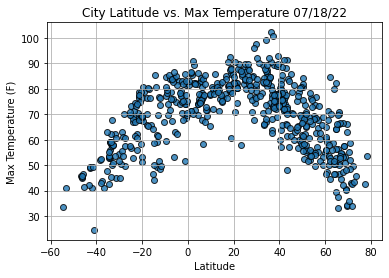

In [18]:
# Import the time module. This is different from when we used "datetime" module.  The time module is a standard Python 
# library so we don't need to install it.

import time

#Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           
            max_temps,
           
           edgecolor="black", linewidths=1, marker="o",
           
           alpha=0.8, label="Cities")

#Incorporate the other graph properties. Using "strftime" to format the date time into a more regular format.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

#Save the Figure.

plt.savefig("weather_data/Fig1.png")

#show plot.

plt.show()

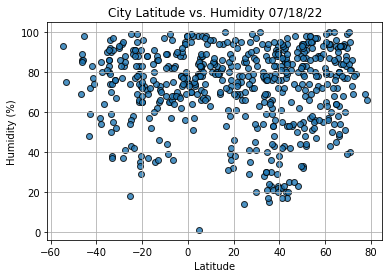

In [19]:
#Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
           humidity,
            
           edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")
           
    
# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

#Show plot.

plt.show()

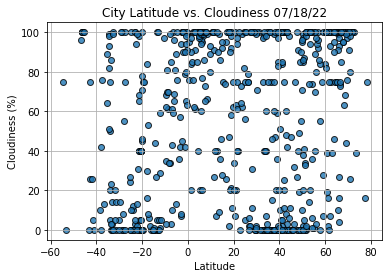

In [20]:
#Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
           cloudiness,
            
           edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")
           
    
# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

#Show plot.

plt.show()

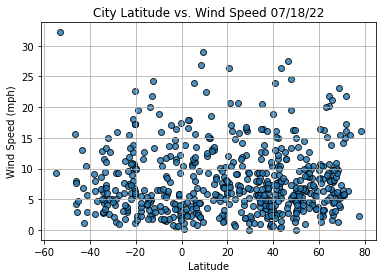

In [21]:
#Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
           wind_speed,
            
           edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")
           
    
# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

#Show plot.

plt.show()

In [23]:
# Import Linregress

from scipy.stats import linregress

#Create a function to create and perform linear regression the weather data and plot a regression line and teh equation 
#with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regressio on hemisphere wather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [25]:
index13 = city_data_df.loc[13]

index13

City                      Ushuaia
Country                        AR
Date          2022-07-19 02:46:57
Lat                         -54.8
Lng                         -68.3
Max Temp                    33.46
Humidity                       93
Cloudiness                     75
Wind Speed                   9.22
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
571     True
572     True
573     True
574     True
575     True
Name: Lat, Length: 576, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Fairmont,US,2022-07-19 02:43:30,39.4851,-80.1426,72.77,93,97,3.83
5,Skibbereen,IE,2022-07-19 02:47:04,51.5500,-9.2667,65.10,91,100,4.92
6,Novocheremshansk,RU,2022-07-19 02:47:29,54.3571,50.1666,66.07,95,74,9.86
10,Dikson,RU,2022-07-19 02:47:30,73.5069,80.5464,45.59,79,39,15.50
11,Aksha,RU,2022-07-19 02:47:31,50.2814,113.2867,84.16,33,2,4.92


In [32]:
#Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Fairmont,US,2022-07-19 02:43:30,39.4851,-80.1426,72.77,93,97,3.83
5,Skibbereen,IE,2022-07-19 02:47:04,51.5500,-9.2667,65.10,91,100,4.92
6,Novocheremshansk,RU,2022-07-19 02:47:29,54.3571,50.1666,66.07,95,74,9.86
10,Dikson,RU,2022-07-19 02:47:30,73.5069,80.5464,45.59,79,39,15.50
11,Aksha,RU,2022-07-19 02:47:31,50.2814,113.2867,84.16,33,2,4.92


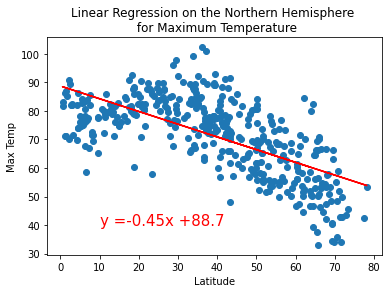

In [35]:
# Linear regression on the Norther Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                      
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))
                      
                    

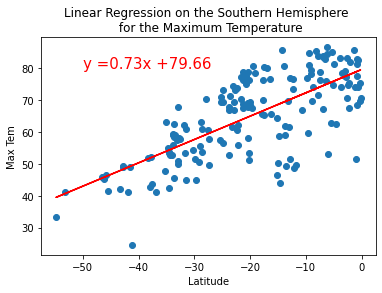

In [38]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                      
                      'Linear Regression on the Southern Hemisphere \n for the Maximum Temperature', 'Max Tem',(-50,80))

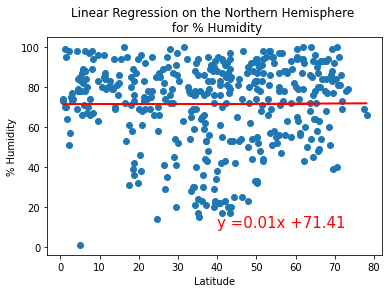

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))
                        

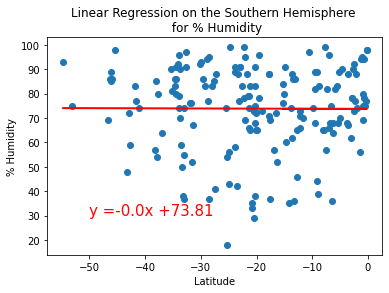

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

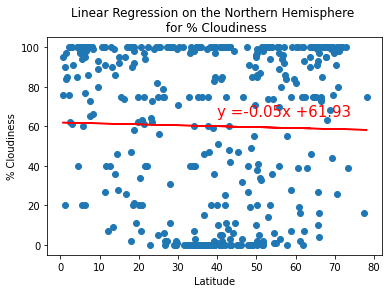

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,65))

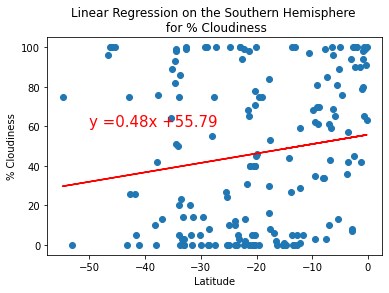

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))
                        

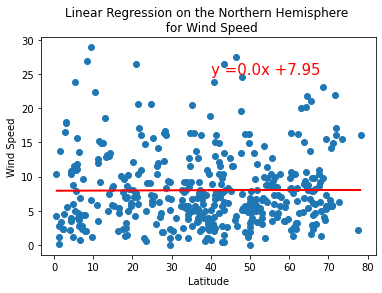

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n  for Wind Speed', 'Wind Speed',(40,25))
                      

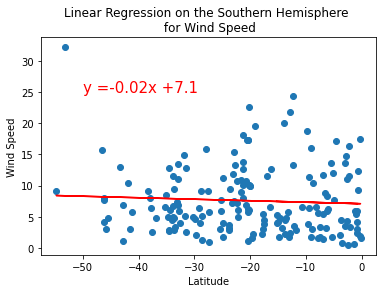

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))
                        